# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

# Export the City List into a csv - will use to check Cities output file
cities_list_df = pd.DataFrame(cities)
cities_list_df.to_csv("../output_data/city_list.csv", index_label="City_ID")

Number of cities in the list: 632


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
# YOUR CODE HERE# This URL will use Metric for units
url =  "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | norman wells
Processing Record 2 of Set 1 | kavieng
Processing Record 3 of Set 1 | tulum
Processing Record 4 of Set 1 | mahebourg
Processing Record 5 of Set 1 | mendahara
City not found. Skipping...
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | new norfolk
Processing Record 8 of Set 1 | lagoa
Processing Record 9 of Set 1 | arraial do cabo
Processing Record 10 of Set 1 | den helder
Processing Record 11 of Set 1 | pacific grove
Processing Record 12 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 13 of Set 1 | mar del plata
Processing Record 14 of Set 1 | nuevo ideal
Processing Record 15 of Set 1 | tsuruoka
Processing Record 16 of Set 1 | cape town
Processing Record 17 of Set 1 | clyde river
Processing Record 18 of Set 1 | atuona
Processing Record 19 of Set 1 | bikramganj
Processing Record 20 of Set 1 | tuktoyaktuk
Processing Record 21 of Set 1 | inta
Proces

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          582
Lat           582
Lng           582
Max Temp      582
Humidity      582
Cloudiness    582
Wind Speed    582
Country       582
Date          582
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,norman wells,65.2820,-126.8329,-25.76,99,96,0.66,CA,1675480100
1,kavieng,-2.5744,150.7967,28.14,73,100,1.92,PG,1675480101
2,tulum,20.2167,-87.4667,21.66,92,69,2.74,MX,1675480101
3,mahebourg,-20.4081,57.7000,25.14,82,60,3.85,MU,1675480101
4,albany,42.6001,-73.9662,-20.43,47,89,2.24,US,1675480102


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")


# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,norman wells,65.2820,-126.8329,-25.76,99,96,0.66,CA,1675480100
1,kavieng,-2.5744,150.7967,28.14,73,100,1.92,PG,1675480101
2,tulum,20.2167,-87.4667,21.66,92,69,2.74,MX,1675480101
3,mahebourg,-20.4081,57.7000,25.14,82,60,3.85,MU,1675480101
4,albany,42.6001,-73.9662,-20.43,47,89,2.24,US,1675480102


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [8]:
# Convert the Date field from Unix timestamp into "yyyy-mm-dd" to use the converted date for chart titles
date = pd.to_datetime(city_data_df["Date"], unit="s")
formatted_date = date[0].strftime('%m/%d/%Y')

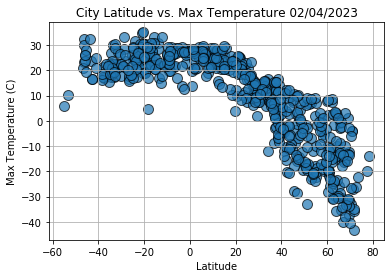

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], alpha=0.7, marker="o", s=100, edgecolors="black")

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title(f"City Latitude vs. Max Temperature {formatted_date}")

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

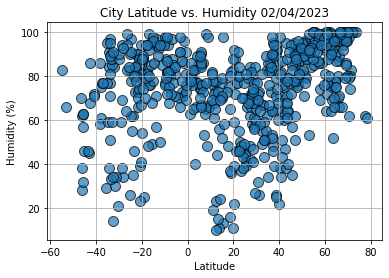

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], alpha=0.7, marker="o", s=100, edgecolors="black")

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity {formatted_date}")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

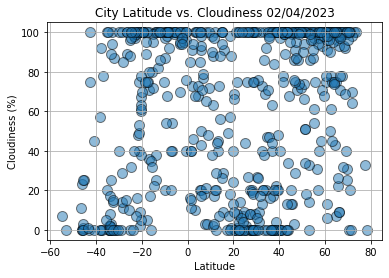

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], alpha=0.5, marker="o", s=100, edgecolors="black")

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness {formatted_date}")

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

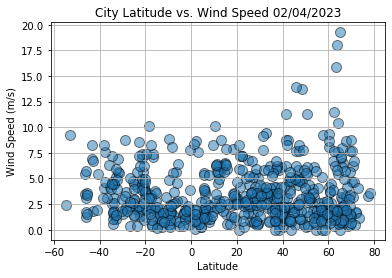

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], alpha=0.5, marker="o", s=100, edgecolors="black")

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"City Latitude vs. Wind Speed {formatted_date}")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots

def plot_linear_regression(X, y, title, xlabel, ylabel):
    slope, intercept, rvalue, pvalue, stderr = linregress(X, y)
    regress_values = X * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    

    plt.scatter(X, y, alpha=0.8)
    plt.plot(X, regress_values, color="red")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.annotate(line_eq,(X.median(),y.min()),fontsize=15, color="red")
    print(f"The r-squared is: {rvalue}")
    plt.show()


In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,norman wells,65.2820,-126.8329,-25.76,99,96,0.66,CA,1675480100
2,tulum,20.2167,-87.4667,21.66,92,69,2.74,MX,1675480101
4,albany,42.6001,-73.9662,-20.43,47,89,2.24,US,1675480102
6,lagoa,39.0500,-27.9833,14.01,85,100,6.10,PT,1675480104
8,den helder,52.9599,4.7593,7.21,93,100,2.68,NL,1675480105


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,kavieng,-2.5744,150.7967,28.14,73,100,1.92,PG,1675480101
3,mahebourg,-20.4081,57.7000,25.14,82,60,3.85,MU,1675480101
5,new norfolk,-42.7826,147.0587,16.51,68,100,1.79,AU,1675480103
7,arraial do cabo,-22.9661,-42.0278,24.25,90,97,8.60,BR,1675480104
10,mar del plata,-38.0023,-57.5575,21.16,75,0,4.02,AR,1675480017


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.855167268554889


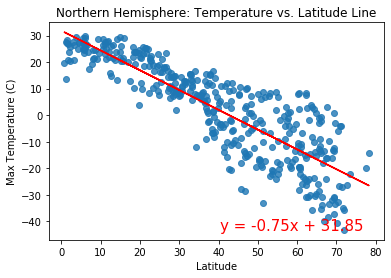

None


In [16]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
print(plot_linear_regression(x_values,y_values,"Northern Hemisphere: Temperature vs. Latitude Line", "Latitude", "Max Temperature (C)"))

The r-squared is: 0.25591531816774327


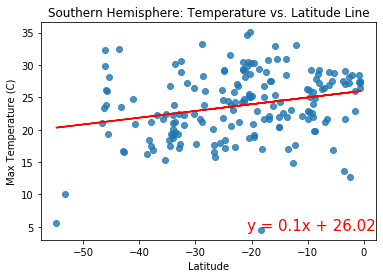

None


In [17]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
print(plot_linear_regression(x_values,y_values,"Southern Hemisphere: Temperature vs. Latitude Line", "Latitude", "Max Temperature (C)"))

**Analysis of the Linear Regression Model for Temperature vs. Latitude:** 

For the Northern Hemisphere, r-squared value of -0.8448711358641668 indicates a strong negative linear relationship between temperature and latitude.  This means that as one variable increases, the other variable decreases in a predictable manner.

For the Southern Hemisphere, the r-squared value of 0.3941885790268264 indicates a weak positive linear relationship between temperature and latitude, therefore other factors may be more important in determining the variation in one of the variables. 



### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.451684626906238


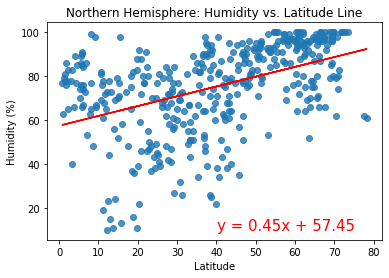

None


In [18]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
print(plot_linear_regression(x_values,y_values,"Northern Hemisphere: Humidity vs. Latitude Line", "Latitude", "Humidity (%)"))

The r-squared is: 0.3511902968461529


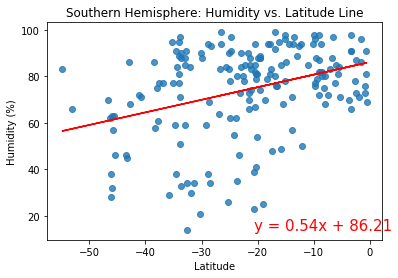

None


In [19]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
print(plot_linear_regression(x_values,y_values,"Southern Hemisphere: Humidity vs. Latitude Line", "Latitude", "Humidity (%)"))

**Analysis of the Linear Regression Model for Humidity vs. Latitude:**

For both Northern and Southen Hemisphere, both r-squared values indicate a weak positive linear correlation betweem humidity and latitude. As one variable increases, the other variable also tends to increase, but not necessarily in a strong or predictable manner. You can see the from the amount of outliers each of the scatter plots show. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.3039928907305779


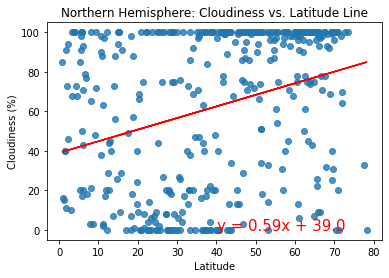

None


In [20]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
print(plot_linear_regression(x_values,y_values,"Northern Hemisphere: Cloudiness vs. Latitude Line", "Latitude", "Cloudiness (%)"))

The r-squared is: 0.564377010062245


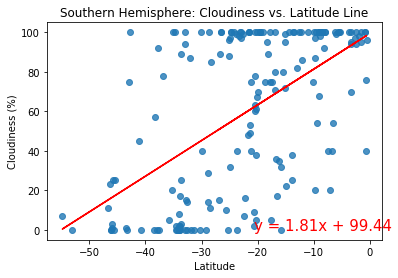

None


In [21]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
print(plot_linear_regression(x_values,y_values,"Southern Hemisphere: Cloudiness vs. Latitude Line", "Latitude", "Cloudiness (%)"))

**Analysis of the Linear Regression Model for Cloudiness vs. Latitude:**

The Pearson correlation coefficient or r-squared for Northen Hemisphere Cloudiness vs. Latitude is indicates a weak positive correlation.  You can see from the scatter plots that the values are all over the chart.  

The r-squared for the Southern Hemisphere is a little better and shows a moderate positive correlation.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.04668297249316415


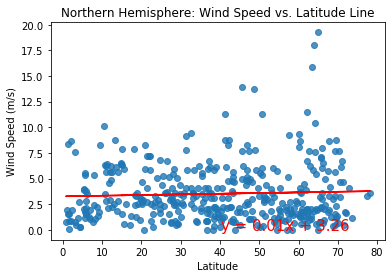

None


In [22]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
print(plot_linear_regression(x_values,y_values,"Northern Hemisphere: Wind Speed vs. Latitude Line", "Latitude", "Wind Speed (m/s)"))

The r-squared is: -0.2717219378498682


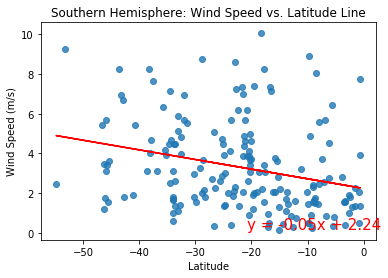

None


In [23]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
print(plot_linear_regression(x_values,y_values,"Southern Hemisphere: Wind Speed vs. Latitude Line", "Latitude", "Wind Speed (m/s)"))

**Analysis of the Linear Regression Model for Wind Speed vs. Latitude:**

For the relationship between Wind Speed and Latitude, both Northern and Southern Hemisphere show a weak correlation.  The Northern Hemisphere's r-squared of 0.05719096737259285 indicates a very weak positive correlation between the two variables while Southern Hemisphere's r-squared of -0.3167576144194467 indicates a weak negative correlation between the two variables. 